In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import pytesseract
# import skimage.io

pytesseract.pytesseract.tesseract_cmd = 'F:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [2]:
class image(object):
    def __init__(self,img1):
        img = cv2.imread(img1)
        img = cv2.resize(img,(1029,644))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
        edged = cv2.Canny(bfilter, 30, 200) #Edge detection
        cropped2 = edged[220:600,540:980]
        keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                location = approx
                break
        width,height= 300,400
        pts1 = np.float32([location[0],location[3],location[1],location[2]])
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        matrix1=cv2.getPerspectiveTransform(pts1, pts2)
        imgId=cv2.warpPerspective(img,matrix1,(width,height), borderValue=(255, 255, 255))
        
        cv2.imwrite('savedImage.jpg',imgId)

        ret, thresh1 = cv2.threshold(edged, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
        rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

        # Appplying dilation on the threshold image
        dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

        # Finding contours
        contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                         cv2.CHAIN_APPROX_NONE)

        # Creating a copy of image
        im2 = img.copy()
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)

            x,y,w,h =540,220,950,580

            # Drawing a rectangle on copied image
            rect = cv2.rectangle(bfilter, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Cropping the text block for giving input to OCR
            cropped = bfilter[y:y + h, x:x + w]

            # Apply OCR on the cropped image
            text = pytesseract.image_to_string(cropped, config='--oem 2 --psm 3')
        with open('file.txt', mode = 'w') as f:
            f.write(text)
        plt.imshow(imgId)
        print(text)
#             return imgId,text

 

 

Mr.Fazni M.F.M
UWU/CST/17/020
Science & Technology

Computer Science &
Technology



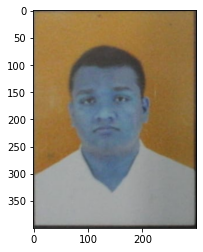

In [4]:
image('F:/CST17020/python/ImageProcessingProject/myProject/id/1.jpg')